In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

performan_tests_results='performance_tests/results/17_points_10_times'

In [ ]:
def get_until_size(df, limit):
    return df[df['size'] < limit]

def to_minutes(df):
    df['avg_time_minutes'] = df['avg_time'] / 60
    return df

In [ ]:
simple_increment_df = get_until_size(pd.read_csv(f'{performan_tests_results}/simple_increment.csv'), 1200)
increment_splitting_transitions_df = get_until_size(pd.read_csv(f'{performan_tests_results}/increment_splitting_transitions.csv'), 1200)
increment_splitting_transitions_in_new_states_df = get_until_size(pd.read_csv(f'{performan_tests_results}/increment_splitting_transitions_in_new_states.csv'), 1200)

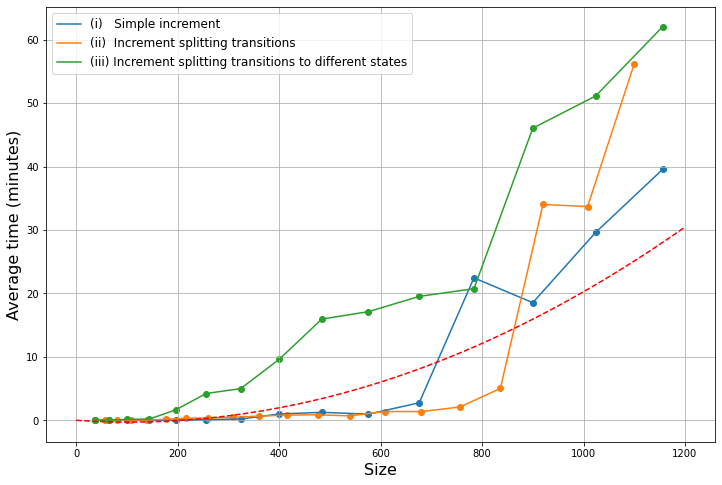

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Función polinomial
def func(x, a, b):
    return a * x**2 + b * x

x = 'size'
y = 'avg_time_minutes'
df1 = to_minutes(simple_increment_df)
df2 = to_minutes(increment_splitting_transitions_df)
df3 = to_minutes(increment_splitting_transitions_in_new_states_df)

x1 = df1[x]
y1 = df1[y]

x2 = df2[x]
y2 = df2[y]

x3 = df3[x]
y3 = df3[y]


# Datos de ejemplo
# x_data = np.concatenate([x1, x2, x3])
x_data = np.linspace(0, 1200)
y_data = np.concatenate([y1, y2, y3])

# Ajuste de la curva polinomial
params, _ = curve_fit(func, x_data, y_data)

# Generar puntos para graficar la curva ajustada
x_curve = np.linspace(min(x_data), max(x_data), 100)
y_curve = func(x_curve, *params)

fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=df1, x=x, y=y, label='(i)   Simple increment', ax=ax)
sns.lineplot(data=df2, x=x, y=y, label='(ii)  Increment splitting transitions', ax=ax)
sns.lineplot(data=df3, x=x, y=y, label='(iii) Increment splitting transitions to different states', ax=ax)

# Graficar los datos y la curva ajustada
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.plot(x_curve, y_curve, 'r--')

ax.legend(fontsize=12)
ax.set_xlabel('Size', fontsize=16)
ax.set_ylabel('Average time (minutes)', fontsize=16)

plt.grid(True)

plt.savefig(f'{performan_tests_results}/bisimulation_performance_graphic.png')

plt.show()
